In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
from datetime import datetime, timedelta, date
from typing import Any
import pandas as pd

In [51]:
def generate_frame(start: datetime, end: datetime, freq: str = '5min'):
	x_axis = pd.date_range(start, end, freq=freq)
	df = pd.DataFrame(index=x_axis)
	df.index.name = 'timestamp'
	return df

def generate_line(slope: float, intercept: float, size: int):
	x_axis = np.linspace(0, size, size)
	y_axis = intercept + slope * x_axis
	return y_axis

def apply_sin(data: np.ndarray, frequency: float, scale: float, size: int, phase: float = 0):
	x_axis = np.linspace(0, size, size)
	y_axis = np.sin(2 * np.pi * (x_axis/frequency) + phase) * scale
	return data + y_axis

def apply_noise(data: np.ndarray, mean: float, scale: float):
	noise = np.random.normal(mean, scale, size=len(data))
	return data + noise

# Low Temperature

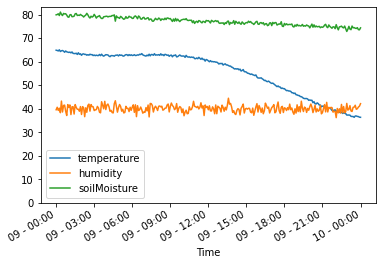

In [59]:
today = datetime.today()
today_no_time = datetime(today.year, today.month, today.day, microsecond=1)
df = generate_frame(today_no_time - timedelta(days=1), today_no_time)
df['temperature'] = apply_noise(apply_sin(generate_line(-0.1, 70, len(df)), 1, 5, len(df), -np.pi/2), 0, 0.25)
df['humidity'] = apply_noise(generate_line(0, 40, len(df)), 0, 1.5)
df['soilMoisture'] = apply_noise(generate_line(-0.02, 80, len(df)), 0, 0.5)
df['light'] = apply_noise(apply_sin(generate_line(0, 60_000, len(df)), 1, 60_000, len(df), -np.pi/2), 0, 1500).astype(int)

ax = df.plot()
date_formatter = matplotlib.dates.DateFormatter('%d - %H:%M')
ax.xaxis.set_major_formatter(date_formatter)
ax.set_ylim(ymin=0)
ax.set_xlabel('Time')
df.to_csv('low_temperature.csv',)